# Fix $\beta$ to _Fermi_ best-fit value

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

## Float $N_D$ and $z_0$

In [2]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','N_bulge', 'beta']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,0,1.34]

floated_params = ['N_disk', 'z0']
floated_param_priors = [[0,3000000],[0.01,2.0]]

rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 500, Nang = 10, share_betas=True, use_prior=True, Nang_prior=500)

In [3]:
chains_dir = '../run/chains/rs_nd_fixbeta_nlive200/'

In [4]:
lge_nd = rs_nd.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_global = np.array(rs_nd.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_fixbeta_nlive200/.txt
  analysing data from ../run/chains/rs_nd_fixbeta_nlive200/.txt


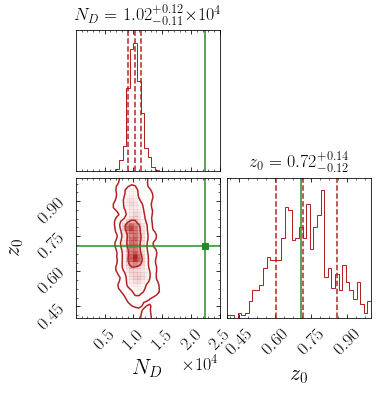

In [5]:
rs_nd.plot_corner(labels = ['$N_D$','$z_0$'], truths = [22500, 0.71], param_range = [(0,2.5e4),(0.4,1)],chains_dir=chains_dir)
plt.subplots_adjust(bottom = .2)
# plt.savefig("plots/rs_nd.pdf")

In [6]:
print "Best-fit log-evidence:",2*lge_nd

Best-fit log-evidence: -628.963919557


In [7]:
print "Best-fit parameters"
zip(floated_params, rs_nd.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_fixbeta_nlive200/.txt


[('N_disk', 10192.105602275926), ('z0', 0.68307110103004309)]

## Float $N_D$, $N_B$ and $z_0$

### Set $\beta$ to same value as above

In [8]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge', 'beta']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,1.24]

floated_params = ['N_bulge','N_disk','z0']
floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0]]

rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 500, Nang = 10, share_betas=True, use_prior=True, Nang_prior=500)

In [9]:
rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [10]:
chains_dir = '../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/'

In [11]:
lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_nb_global = np.array(rs_nd_nb.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/.txt
  analysing data from ../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/.txt


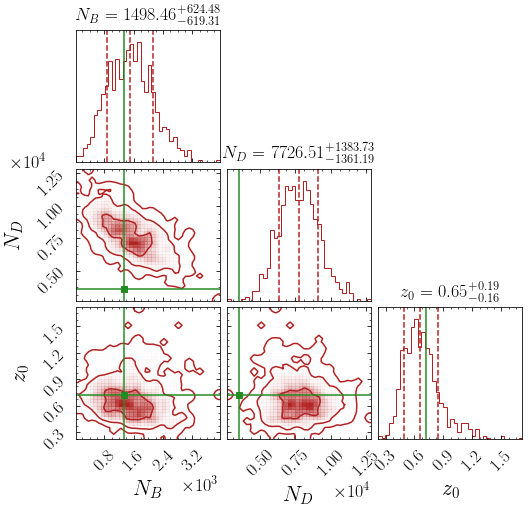

In [12]:
rs_nd_nb.plot_corner(labels = ['$N_B$','$N_D$','$z_0$'], truths = [1330, 3560, 0.72],  chains_dir=chains_dir)
plt.subplots_adjust(bottom = .2)
# plt.savefig("plots/rs_nd_nb.pdf")

In [13]:
print "Best-fit log-evidence:",2*lge_nd_nb

Best-fit log-evidence: -623.351652968


In [14]:
print "Best-fit parameters"
zip(floated_params, rs_nd_nb.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_nb_fixbeta_samebeta_nlive200/.txt


[('N_bulge', 1390.4421770005415),
 ('N_disk', 7765.217937827606),
 ('z0', 0.60815285519738482)]

In [15]:
TS = 2*(lge_nd_nb - lge_nd)
print "TS =", TS
print np.sqrt(TS), "sigma"

TS = 5.61226658907
2.36902228547 sigma


In [16]:
BF = np.exp(lge_nd_nb_global - lge_nd_global)
print "Bayes Factor =", str(BF[0])[:4], "±",  str(BF[1])[:4]

Bayes Factor = 0.01 ± 1.07


### Set $\beta$ to _Fermi_ best-fit

In [17]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge', 'beta']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,1.34]

floated_params = ['N_bulge','N_disk','z0']
floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0]]

rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 500, Nang = 10, share_betas=True, use_prior=True, Nang_prior=500)

In [18]:
rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [19]:
chains_dir = '../run/chains/rs_nd_nb_fixbeta_nlive200/'

In [20]:
lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_nb_global = np.array(rs_nd_nb.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_nb_fixbeta_nlive200/.txt
  analysing data from ../run/chains/rs_nd_nb_fixbeta_nlive200/.txt


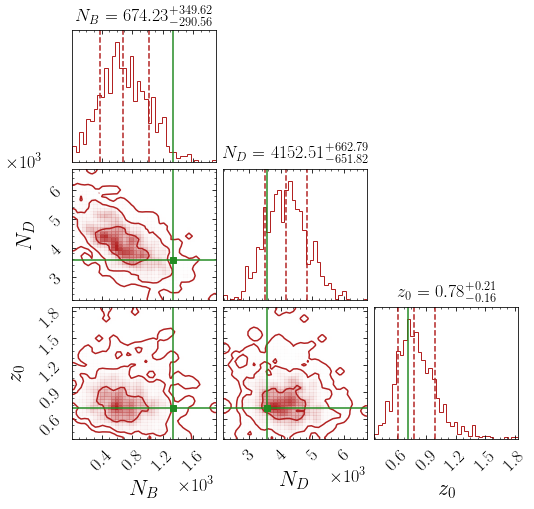

In [21]:
rs_nd_nb.plot_corner(labels = ['$N_B$','$N_D$','$z_0$'], truths = [1330, 3560, 0.72],  chains_dir=chains_dir)
plt.subplots_adjust(bottom = .2)
# plt.savefig("plots/rs_nd_nb.pdf")

In [22]:
print "Best-fit log-evidence:",2*lge_nd_nb

Best-fit log-evidence: -635.392753478


In [23]:
print "Best-fit parameters"
zip(floated_params, rs_nd_nb.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_nb_fixbeta_nlive200/.txt


[('N_bulge', 623.06745447816525),
 ('N_disk', 4189.360943951815),
 ('z0', 0.73775206302387175)]

In [24]:
TS = 2*(lge_nd_nb - lge_nd)
print "TS =", TS
print np.sqrt(TS), "sigma"

TS = -6.42883392145
nan sigma


/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


In [25]:
BF = np.exp(lge_nd_nb_global - lge_nd_global)
print "Bayes Factor =", str(BF[0])[:4], "±",  str(BF[1])[:4]

Bayes Factor = 4.77 ± 1.09
